In [2]:
import pandas as pd


In [4]:
#The two datasets chosen are: Health expenditures per capita (2010-21) and Net national income (2010-21)
#Source: https://databank.worldbank.org/source/health-nutrition-and-population-statistics

In [ ]:
health_expenditures = pd.read_csv("WB_HealthExpenditures.csv")
net_nationalincome = pd.read_csv("WB_NetNationalIncome.csv")

In [ ]:
#Reshape datasets into long format

In [59]:
health_expenditures_long = health_expenditures.melt(id_vars="Country Name",var_name="Year",value_name="Health_expenditures")
net_nationalincome_long = net_nationalincome.melt(id_vars="Country Name",var_name="Year",value_name="Net_nationalincome")

In [ ]:
#Convert 'Year' column to integer for consistency

In [60]:
health_expenditures_long["Year"] = health_expenditures_long["Year"].astype(int)
net_nationalincome_long["Year"] = net_nationalincome_long["Year"].astype(int)

In [ ]:
#Identify countries with net annual income < 10 trillion across all years

In [69]:
filtered_countries = net_nationalincome_long.groupby('Country Name')['Net_nationalincome'].max()
filtered_countries = filtered_countries[filtered_countries < 1_000_000_000_000].index

In [70]:
#Filter both datasets to include only the selected countries

In [71]:
net_nationalincome_long = net_nationalincome_long[net_nationalincome_long['Country Name'].isin(filtered_countries)]
health_expenditures_long = health_expenditures_long[health_expenditures_long['Country Name'].isin(filtered_countries)]

In [72]:
#Merge the datasets on 'Country' and 'Year'

In [73]:
merged_data = pd.merge(health_expenditures_long, net_nationalincome_long, on=["Country Name","Year"],how="inner")
merged_data

,Country Name,Year,Health_expenditures,Net_nationalincome
0,Afghanistan,2010,46.57988,1.428998e+10
1,Africa Eastern and Southern,2010,105.426618,6.471000e+11
2,Africa Western and Central,2010,60.187467,4.555220e+11
3,Albania,2010,255.318192,1.022425e+10
4,Algeria,2010,230.063919,1.248960e+11
...,...,...,...,...
2107,"Venezuela, RB",2021,160.0984039,NaN
2108,Viet Nam,2021,172.5529785,2.960550e+11
2109,"Yemen, Rep.",2021,..,NaN
2110,Zambia,2021,75.3394928,1.196910e+10


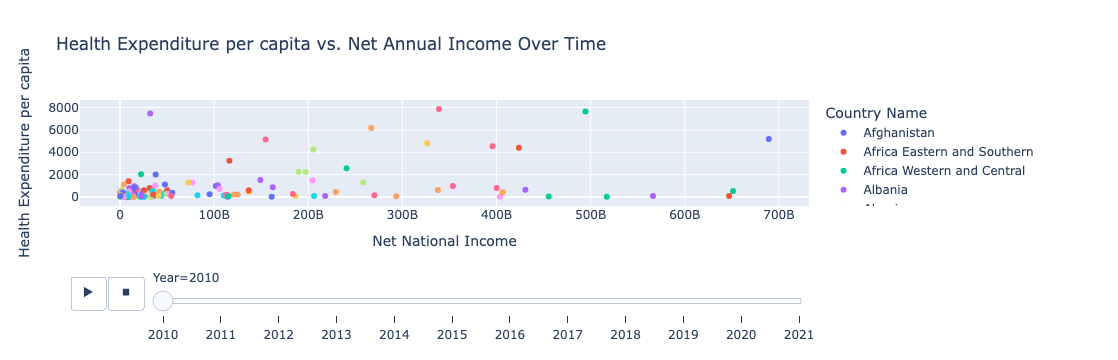

In [74]:
import plotly.express as px

fig = px.scatter(
    merged_data, 
    x='Net_nationalincome', 
    y='Health_expenditures', 
    color='Country Name', 
    hover_name='Country Name', 
    animation_frame='Year', 
    title='Health Expenditure per capita vs. Net Annual Income Over Time',
    labels={'Net_nationalincome': 'Net National Income', 'Health_expenditures': 'Health Expenditure per capita'}
)
fig.show()

In [ ]:
#The initial hypothesis was that as net national income increases, health expenditure per capita should also increase. While this relationship is not immediately apparent in the scatter plot, tracking individual countries over the years reveals a diagonal (north-east) movement, suggesting that health expenditure per capita tends to rise alongside income. However, the dataset includes countries with diverse population sizes and socio-economic factors, making it difficult to draw definitive conclusions. A more targeted analysis, focusing on regional groups or countries with similar population sizes and socio-economic conditions, could provide deeper insights into this relationship.